In [25]:
# Original setup referencing "02_end_to_end_machine_learning project"
# STUDENTS: Christopher Acciai and Luis De La Espreilla (cga4yc and lfd2tb)

from __future__ import division, print_function, unicode_literals

import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [26]:
import pandas as pd

happiness = pd.read_csv('2017.csv')
happiness.info()
happiness.describe()
happiness.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
Country                          155 non-null object
Happiness.Rank                   155 non-null int64
Happiness.Score                  155 non-null float64
Whisker.high                     155 non-null float64
Whisker.low                      155 non-null float64
Economy..GDP.per.Capita.         155 non-null float64
Family                           155 non-null float64
Health..Life.Expectancy.         155 non-null float64
Freedom                          155 non-null float64
Generosity                       155 non-null float64
Trust..Government.Corruption.    155 non-null float64
Dystopia.Residual                155 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 14.6+ KB


,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


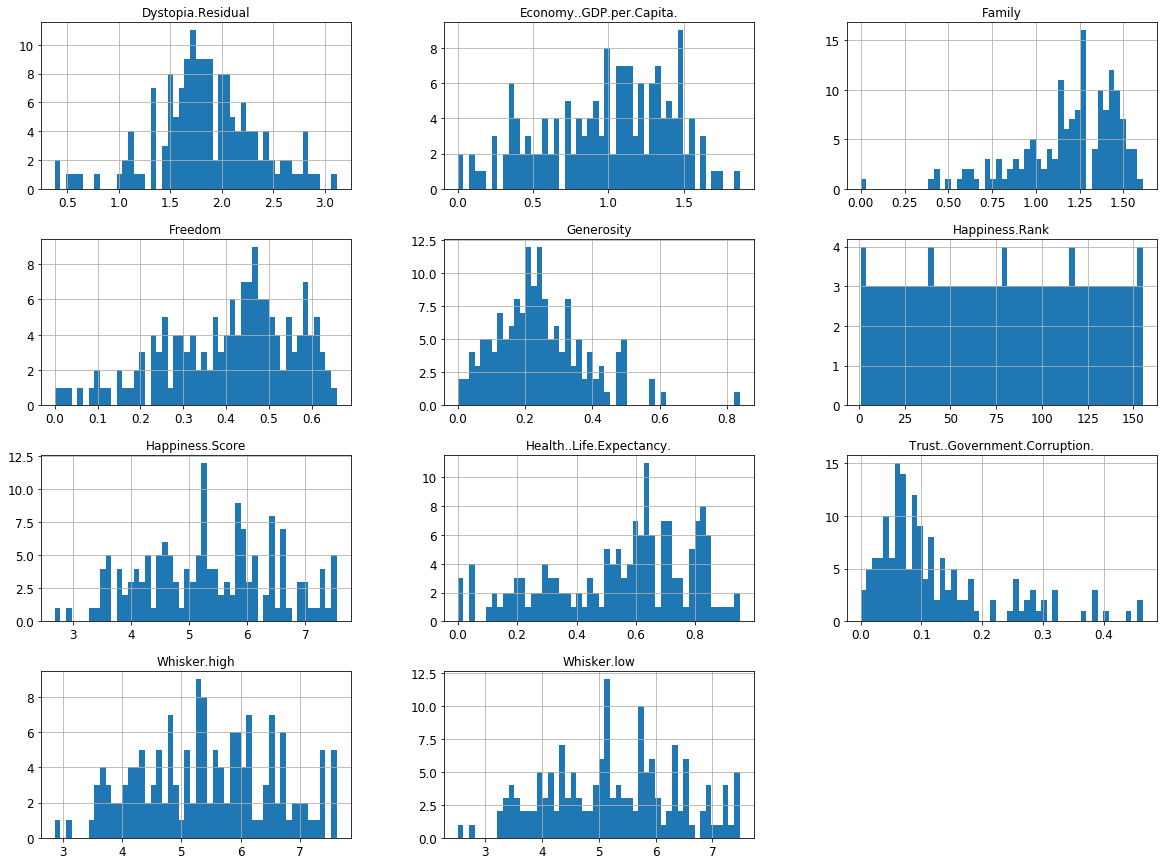

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
happiness.hist(bins=50, figsize=(20,15))
plt.show()

In [28]:
np.random.seed(42)

In [29]:
from sklearn.model_selection import train_test_split

columns = ['Whisker.high','Whisker.low', 'Country','Happiness.Rank']
happiness = happiness.drop(columns, axis=1)
happiness.columns = ['Happiness_Score','Economy', 'Family',
       'Health', 'Freedom', 'Trust',
       'Generosity', 'Dystopia_Residual']

train_set, test_set = train_test_split(happiness, test_size=0.2, random_state=42)

test_set.head()

,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
81,5.250,1.128431,1.431338,0.617144,0.153997,0.065020,0.064491,1.789464
142,3.657,0.431085,0.435300,0.209930,0.425963,0.207948,0.060929,1.885631
31,6.424,1.127869,1.425792,0.647239,0.580201,0.572123,0.031613,2.039508
29,6.452,1.233748,1.373193,0.706156,0.550027,0.210557,0.070984,2.307200
118,4.460,0.339234,0.864669,0.353410,0.408843,0.312651,0.165456,2.015744


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1182bdcc0>,
      dtype=object)

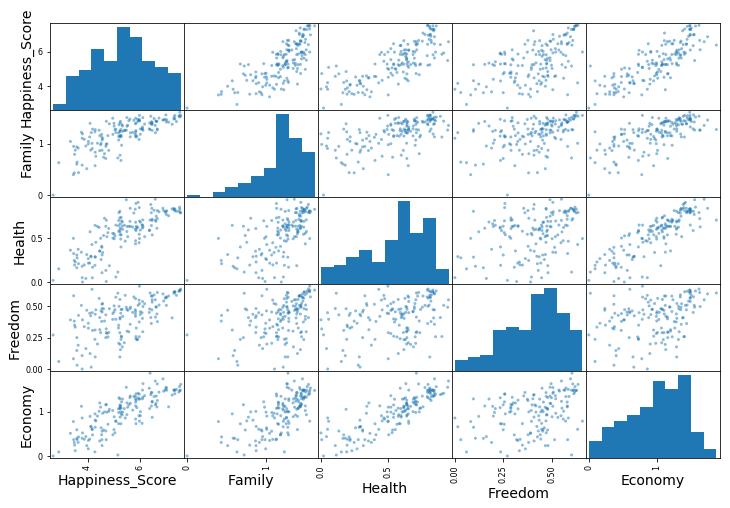

In [30]:
from pandas.plotting import scatter_matrix

attributes = ["Happiness_Score", "Family", "Health", "Freedom", "Economy"]
scatter_matrix(happiness[attributes], figsize=(12, 8))

[0, 2, 0, 8]

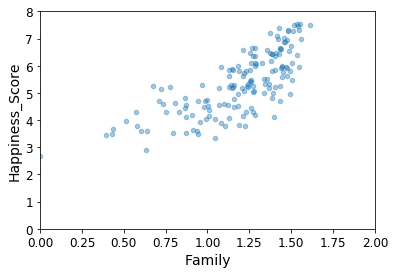

In [31]:
happiness.plot(kind="scatter", x="Family", y="Happiness_Score",
             alpha=0.4)
plt.axis([0, 2, 0, 8])

[0, 1, 0, 8]

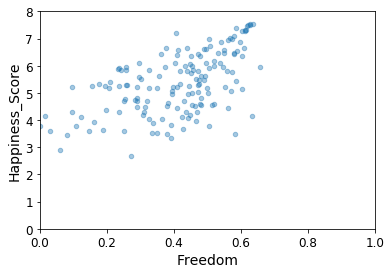

In [32]:
happiness.plot(kind="scatter", x="Freedom", y="Happiness_Score",
             alpha=0.4)
plt.axis([0, 1, 0, 8])

In [33]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_set, train_set.Happiness_Score)

print("Predictions:", lin_reg.predict(train_set)[0:10])

print("Actual:", list(train_set.Happiness_Score)[0:10])

train_set.head()


Predictions: [5.01100016 4.29199982 5.23699999 4.6079998  5.61100006 5.90199995
 6.52699995 4.03200006 5.29300022 5.82499981]
Actual: [5.01100015640259, 4.29199981689453, 5.23699998855591, 4.60799980163574, 5.61100006103516, 5.90199995040894, 6.52699995040894, 4.03200006484985, 5.2930002212524405, 5.824999809265139]


,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
96,5.011,0.885416,1.340127,0.495879,0.501538,0.474055,0.173380,1.140184
122,4.292,0.648457,1.272031,0.285349,0.096098,0.201870,0.136957,1.651637
82,5.237,1.121129,1.238376,0.667465,0.194989,0.197911,0.088174,1.729192
109,4.608,0.586683,0.735132,0.533241,0.478357,0.172255,0.123718,1.978736
65,5.611,1.320879,1.476671,0.695168,0.479131,0.098891,0.183249,1.357509


In [34]:
from sklearn.metrics import mean_squared_error

happiness_predictions = lin_reg.predict(train_set)
lin_mse = mean_squared_error(train_set.Happiness_Score, happiness_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

1.2680458479633863e-15


In [35]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(train_set.Happiness_Score, happiness_predictions)
print(lin_mae)

1.006363451353771e-15


In [36]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(train_set, train_set.Happiness_Score)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [37]:
happiness_predictions = tree_reg.predict(train_set)
tree_mse = mean_squared_error(train_set.Happiness_Score, happiness_predictions)
tree_rmse = np.sqrt(tree_mse)
print(tree_rmse)

0.0


In [38]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, train_set, train_set.Happiness_Score,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [39]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [0.02883636 0.06848305 0.04915758 0.05745036 0.06672333 0.05544071
 0.07430396 0.07717622 0.04349811 0.24027154]
Mean: 0.07613412187975757
Standard deviation: 0.05647995209780706


In [40]:
lin_scores = cross_val_score(lin_reg, train_set, train_set.Happiness_Score,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [8.88178420e-16 1.05953280e-15 1.89615012e-15 1.05234944e-15
 1.06488852e-15 7.69185075e-16 1.22292633e-15 1.03356139e-15
 6.78357473e-16 7.36438641e-16]
Mean: 1.0401568198888547e-15
Standard deviation: 3.296930524718984e-16


In [41]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(train_set, train_set.Happiness_Score)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [42]:
happiness_predictions = forest_reg.predict(train_set)
forest_mse = mean_squared_error(train_set.Happiness_Score, happiness_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.040197281054113125

In [43]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, train_set, train_set.Happiness_Score,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.04950902 0.05317953 0.05984437 0.05050552 0.07942834 0.03272781
 0.0459378  0.05998556 0.04770639 0.23887813]
Mean: 0.07177024588824359
Standard deviation: 0.0568584718511493


In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(train_set, train_set.Happiness_Score)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [45]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [46]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [47]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.4075880380960842 {'max_features': 2, 'n_estimators': 3}
0.27965800480738856 {'max_features': 2, 'n_estimators': 10}
0.24949077319624496 {'max_features': 2, 'n_estimators': 30}
0.228268276033647 {'max_features': 4, 'n_estimators': 3}
0.19135257177466455 {'max_features': 4, 'n_estimators': 10}
0.16720864646693456 {'max_features': 4, 'n_estimators': 30}
0.15411471289787385 {'max_features': 6, 'n_estimators': 3}
0.12425505369065037 {'max_features': 6, 'n_estimators': 10}
0.12074741352529854 {'max_features': 6, 'n_estimators': 30}
0.10703373838936385 {'max_features': 8, 'n_estimators': 3}
0.09350574716022692 {'max_features': 8, 'n_estimators': 10}
0.09306662143427313 {'max_features': 8, 'n_estimators': 30}
0.394803862505312 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.28523626085096543 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.26172323438089046 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.19918057682602708 {'bootstrap': False, 'max_featu

In [48]:
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(test_set)

final_mse = mean_squared_error(test_set.Happiness_Score, final_predictions)
final_rmse = np.sqrt(final_mse)

print(final_rmse)

0.10204799785545327
